1)	We first load in the environment variables. This will be the OpenAI API key

2)	We import the libraries needed to create the Tools, Agents, State and the LangGraph itself. This includes import of the following:

•	LangGraph
•	Typing and operator to construct the Agent state
•	The different message types. These are the LangChain message type which are used to represent the human in AI and the System message type (elaborate on this)
•	We import Travily – the search engine – that is the tool used.
•	We import ChatOpenAI which is the LangChain wrapper around OpenAI but can used for an Language Model

3)	We create the tool with max_results = 2 which means we get only two responses from the API.

4)	We create the AgentState class – this is an annotated list of messages that we add over time

5)	We create the Agent class. This has three functions: one function to call OpenAI, another function to see if there is an action present and another function to take the action.

6)	We create the Graph

7)	We initialize the state of the Graph and the AgentState

8)	The Graph when created will not have nodes, edges yet

9)	We create the three functions mentioned before:   two as nodes and one as an edge

10)	We create the nodes: the LLM, action node and declare and define the functions

11)	We add the conditional edge

12)	To the conditional edge, the first argument we pass is the node where the edge starts, the second is the function which determines where to go after that.

13)	The third argument is the dictionary which defines how to map the response of the function which determines where to go after that.

14)	If the function returns true we go to the next node to go to, if it returns false we go to the end node.

15)	We add regular edge which goes from action node to the LLM node

16)	We set the entry point of the Graph – the LLM node

17)	We compile the Graph

18)	After compiling, we turn it into a LangChain runnable

19)	LangChain runnable expresses a standard interface for calling and invoking the Graph. We save the Graph as an attribute of the class and we also save the tools and the model passed in. For the tools, we create a dictionary mapping the name of the tool to the tool itself.

20)	We bind the tools with the model – the bind tool lets the model know what the tools are it has available to call.

21)	We next create the functions mentioned above. That is – function to represent the LLM node, function to represent the action node and function for the conditional edge.

We add these as methods of the Agent Class

22)	For the function representing the LLM node, it will call the OpenAI LLM

23)	This function will get the list of messages from the state and will add in the system message and will add in the system message. Because the list of messages uses operator.add this isn’t overwriting but adding to the state.

24)	We also do the same with the Action node

25)	The action node will take the Agent state

26)	We get the last message from the list of messages – we know if we get into the state, the Language model will have to call a tool.

27)	This means that there will be a tool call attribute already present on the last message of the Agent State. This could be a list of tools.

28)	All modern models support parallel tools or parallel function calling. We loop through the tool, find the tool name through the dictionary, invoke the tool passing the arguments from the tool call. We append

29)	Finally, we define a conditional edge. This will take the result after the LLM is called and return aa Boolean representing true or false – indicating whether we should take an action or not.

30)	In order that we get the last message from the state which is the most recent call from the Language Model, we are going to return length of the message tool calls > 0

31)	IF there are any tools calls that are beign returned, true will be returned else – false

32)	Now we have the Agent ready to use


Using the Agent

1)	In order to start using the Agent, we create a system prompt, initialise the ChatOpenAI and the Language model to use.

2)	For the list of tools, we just pass the Tivily Search tool

3)	Visualizing the Graph – we visualize the graph using the command XX

Figure 15:01 of 19:04


Calling the Agent:

1)	We call the Agent by creating a HumanMessage which represents a user message.

2)	We put that into the list of messages into the messages attribute

3)	Once we have the input, we invoke the Agent, Graph and get back a result

4)	We add some print statements within the Agent so we can what it is calling as shown below:


Put the figure of the print statements

5)	We can see the result as a list of messages; we get the final message from the last in the list which is the result.

6)	We can invoke the Agent with more complicated question like: “What is the weather in SF And LA like?” We can see the Agent calls Trivily search API with “What’s the weather in SA like and then before going back to the model it calls the API with What’s the weather in LA like? This is an example fo parallel processing as the questions are independent of one another.

If we look at the final message it will give the answer for weather in SF and LA.

7)	We invoke the Agent with a more complicated question like: “Who was the Super Bowl in 2024 and what is the GDP of that State” and it then goes back to the model and then calls Tivily again to query for the GDP of Missouri and then go back to the model and then it done.

We retrieve the final response by retrieving the last element of the message attribute. The difference here is that in order to answer the second part of the query it has to know the result of the first part of query. So it calls the tool and then gets back to the model in order to enable the call to the tool second time.

This is different from parallel processing as the tall to the tool is not happening in parallel and is happening sequentially.

The next section goes into the detail of how Tivily Search works in the background,


In [ ]:
# Last lesson, we built Agent from scratch
# We now build Agent using LangGraph
# We introduce some of its compoent and features
# In the lesson, building Agent from scratch,
# We did the following:
# 1) We had the user message
# 2) We had the system prompt
# 3) We called the LLM
# 4) Thisn outputted
# 5) Thought, Action
# 6) Based on that we made a decision
# 7) we return or call a tool
# 8) See figure below:

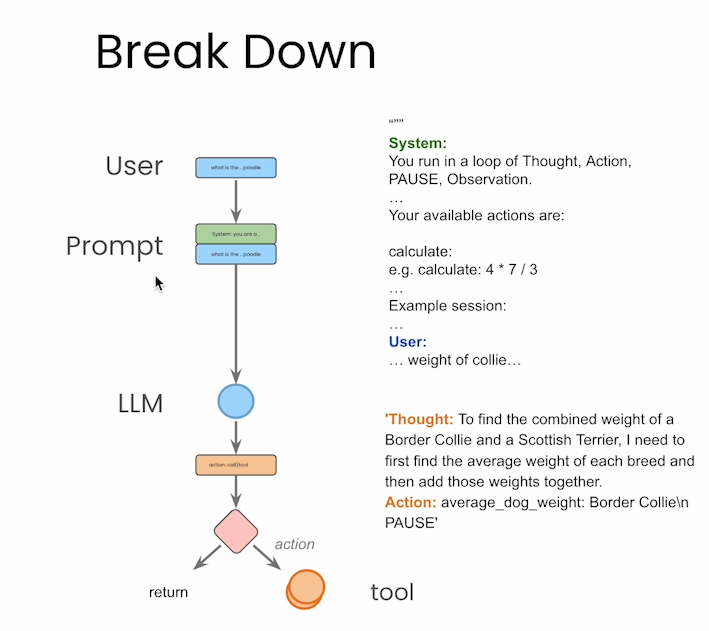

In [ ]:
# 9) We put this ina  query function
# 10) We had two tools: calculate and average_do_weight
# 11) See below

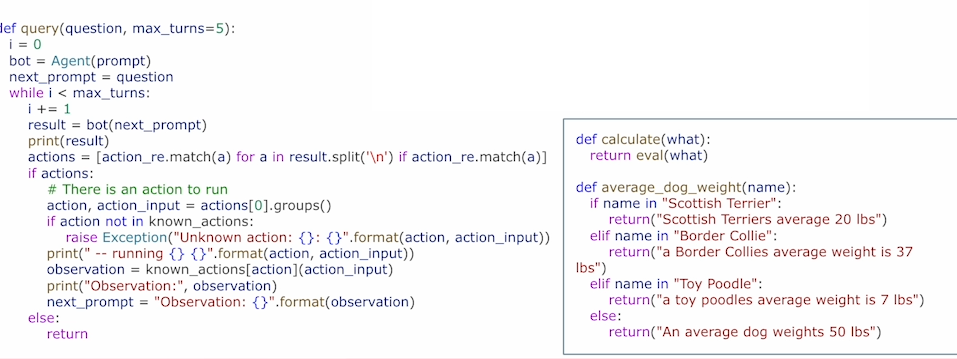

In [ ]:
# 12) We call the tool
# 13) We get back an observation
# 14) we loop back in to the prompt
# 15) We put the observation as a new message
# 16) Lets break it down into LAngChain Components

In [ ]:
# 17) First ket us talk about prompts
# 18) Prompt teamplates allow reusable prompts
# 19) That is we can create soemthign like the below

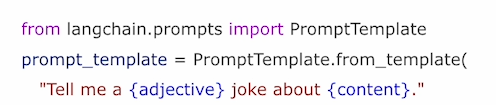

In [ ]:
# 20) We have the string with formatted variables
# 21) which we can replace
# 22) Formatted variables can come from user content
# 23) Examples: https://smith.langchain.com/hub/hwchase17/react

Example from LangChain Hub:
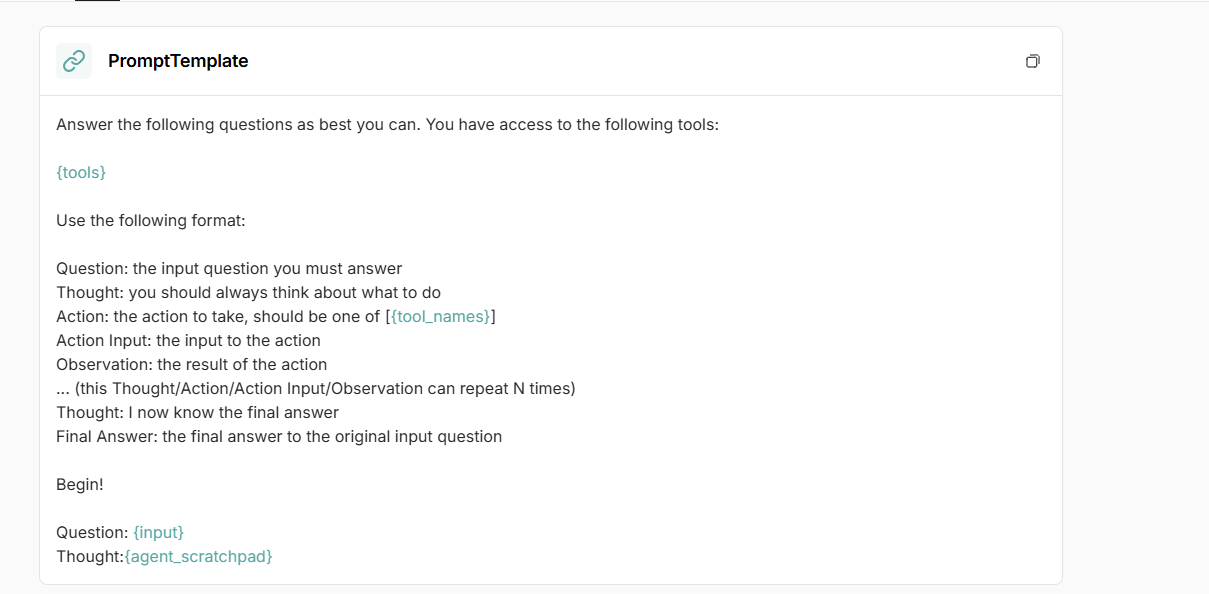

In [ ]:
# 24) It can be seen that we do not hard code the tools themselves
# 25) We ahve the formatted variables
# 26) Go to the LAngChain hub

In [ ]:
# 27) So first component in LangChain is Prompt Templates
# 28) NExt compnent in LangChain we have is tools
# 29) LAnChain communit package has tools
# 30) For example, we have the Tavily tool


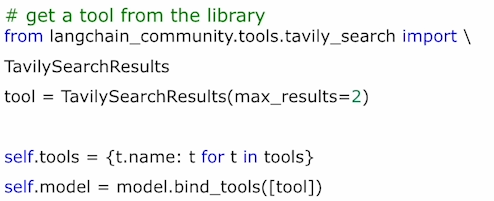

In [ ]:
# 31) LangChain community package contains 100's of other tools
# 32) The biggest part of building the Agent frocm scratch was the loop
# represented by the arrows below

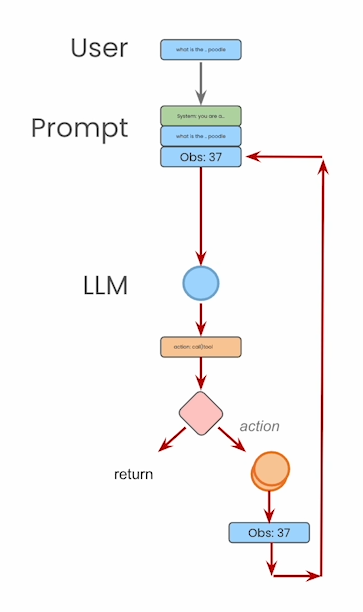

In [ ]:
# 33) That's one way to thnk about LAngGraph
# 34) LangGraph helps you describe and orchestrate the control flow
# 35) It allows you to craete cyclic graphs as represnted above
# 36) It also allows comes with built in prrsistence
# 37) This is nice to remmeber iterations
# 38) PErsistence enables human in the lop featues
# 39) Look at the below diagrams which are Agents from academic papers

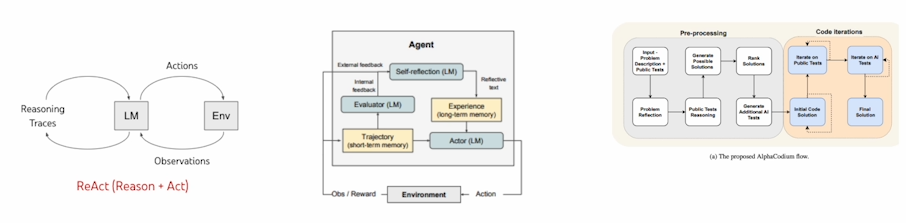

In [ ]:
# 40) These are Agents from Academic papers
# 41) These are represented as Graphs
# 42) This was the motivation behind LangGraph
# 43) LangGraph is an extension of LangChain
# 44) It is sepecifically aimed at Agent and Multi Agent flows
# 45) Allows for really controlled flows


In [ ]:
# 46) Core Cocnepts of LAngGraph
# 47) Three of the core cocnepts of LAngGraph are
# 48) Nodes
# 49) Edges
# 50) Conditional Edges
# 51) Nodes are Agents or Fucntions
# 52) Edges conenct these nodes
# 53) Conditional Edges are used when you have to amke decisions about which ndoe to go to next
# 54) Lets craete a LAngGraph which is equivalent to the function we created earlier
# as also mentioend above

In [ ]:
# 55) We have an Agent node which is the LLM
# 56) We ahve the conditional edge
# 57) which takes the result of the LLM Call and decides
# what to do next
# 58) One of the Edges is an action edge which calls the function node
# 59) And then automatically loops back to the Agent node
# 60) There is an entry point where you'd start
# 61) and then there is the end node which is the other action available to take
# 62) This is illustrated below


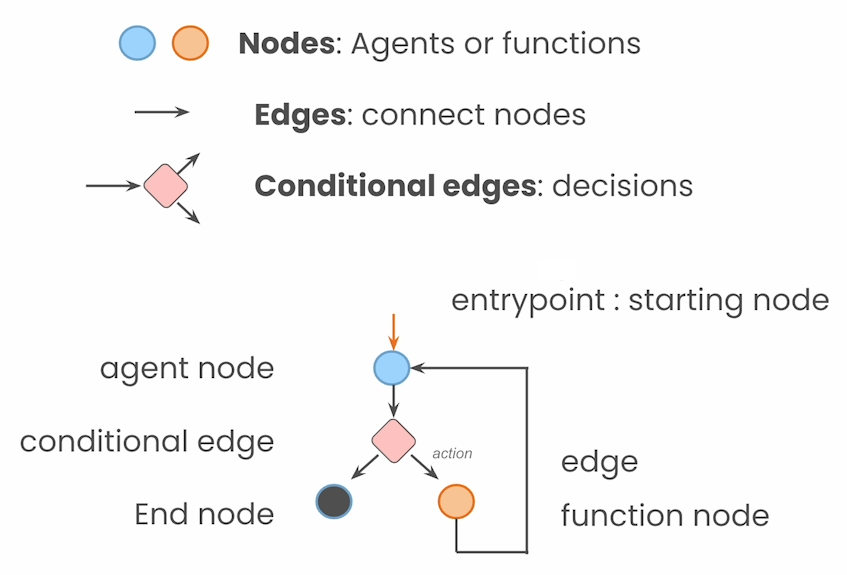

In [ ]:
# Data/State
# 1) One of the important point to keep in mind when working with
# LangGraph is the state which is tracked over time
# 2) This is often called the Agent Sate as illustarted below

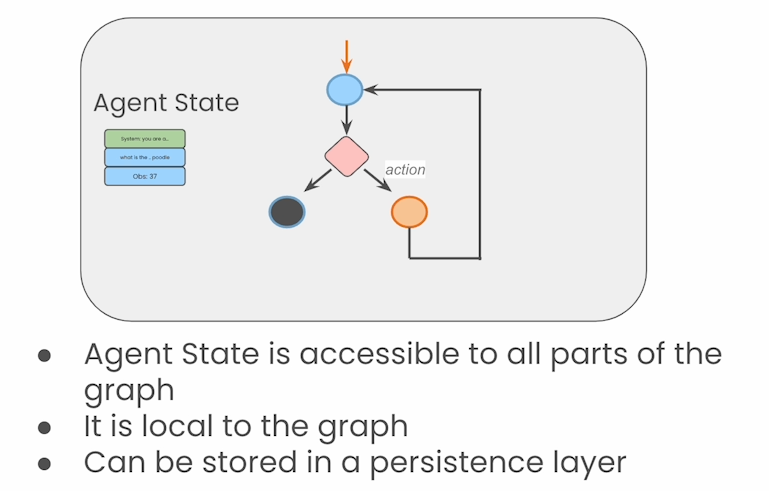

In [ ]:
# 3) This is accesible at all parts of the Graph -
# 4) At each node and at each edge
# 5) It is local to the Graph and is stored in persistence
# layer
# 6) This means you can resume with teh sate at any point in time
# 7) See below:

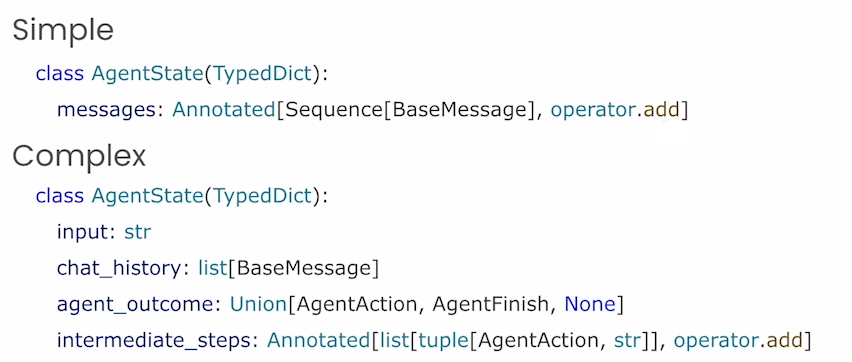

In [ ]:
# 8) As seen above in Simple Stae, we have a list of messages.
# 9) The message variable is a sequence of BaseMessage
# 10) BaseMessage is of LAngChain type
# 11) It's annotated with operator.add
# 12) This means that when the state is updated with new messages,
# it doesn't override the existing message but it adds them to the state
# 13) Lets take a look at a more Complex Satte as shown in the screenshot above
# 14) Here we have input, chat history, agent outcome and intermediate steps
# 15) They ahve their different types
# 16) Three of them are not annotated in anyway
# 17) This means when a new update is pushed to that variable it overides the
# existing variable
# 18) However, intermediate steops is annotated
# 19) Its annotated with operator.add whch emans when a new update is pused,
# it addds to it
# 20) This msakes sense because intermediate steps is what is tracked
# as Agent Action and Agent Observation throughout the graph as it
# executes.
# 21) We continuously add to that as more and more actions are taken


In [ ]:
#Code


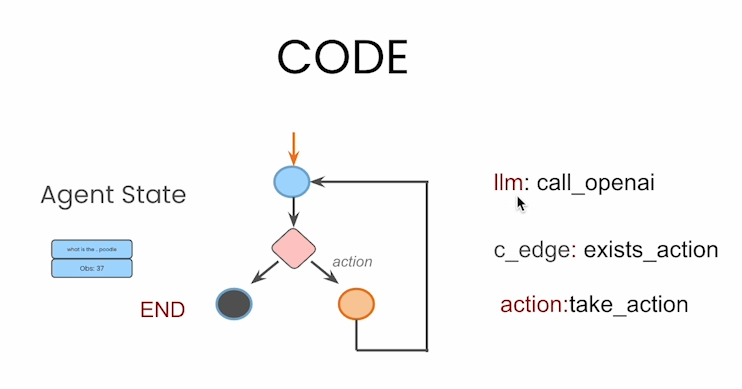

In [ ]:
# 1) Now getting speciifc about the previous Agent,
# we created and how that will map to a LAngGraph object

# 2) We can wee we will ahve one node which will call the LLM
# its called call_openai

# 3) We have a conditional edge which will check for the existance
# of an action to take

# 4) We call this exists_action

# 5) We will have another node which wil take an acion and
# we call it take_Action

#6) And the state that we track is simple - its just the list of messages and
# we keep augmenting it over time.

# 7) This is a high level overview.

# 8) We dive into teh code

In [ ]:
# Code
# We load in the env variables we gotta use

import os
import openai
os.environ["OPENAI_API_KEY"] = ""
openai.api_key = os.environ['OPENAI_API_KEY']
os.environ["TAVILY_API_KEY"] = ""

In [ ]:
# We import a bunch of things
# These are to create: Tolls, AgentState and the LAngGraph itself
# We import SatteGraph and ENd node from LangGraph
# typing import and operator are used to construct Agent state
# We have different message types
# These are LangChain Message types to represent human and AI and
# system messages
# We import LAngChain wrapper around OpenAI API
# We can switch hat to any LMs LC supports without changing any lines of code
# Finally, we import Tavilly the search engine

# Notes on Annotated:

# Think of Annotated as a wrapper around a type that lets you bolt on arbitrary
# “extra info” (metadata) without changing the underlying type.
# Physically, it’s not its own special object with magic behavior
# — it’s just a hint container that frameworks can read.

# The operator module just provides function forms of built‑in operators.
# operator.add(a, b) → a + b operator.or_(a, b) → a | b, etc.

In [ ]:
!pip install langgraph
!pip install langchain-openai
!pip install langchain-community
from langgraph.graph import StateGraph, END
from typing import TypedDict, Annotated
import operator
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, ToolMessage
from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults

In [ ]:
# We craete the tool by intializing TavilySearchResults
# We initialize with max_results to 4
# This means we will get 4 responses from serach api
# API key is free: https://app.tavily.com/home
tool = TavilySearchResults(max_results=4) #increased number of results
print(type(tool))
print(tool.name)

<class 'langchain_community.tools.tavily_search.tool.TavilySearchResults'>
tavily_search_results_json


In [ ]:
# We can see tool name is tavily_search_results_json
# This is the name the Language Model will use to call
# this tool.

In [ ]:
# We craete the AgentSatte
# As stated abovem, its just an annotated list of messages
# LangGraph just requires some state type — it can be dict, TypedDict, pydantic.BaseModel, etc.

# You choose the fields, their types, and (optionally) their merge operators.

# Many LangGraph examples define AgentState like yours because message
# ‑passing is a common pattern, but you could name it anything
# and add more fields as needed.
class AgentState(TypedDict):
    messages: Annotated[list[AnyMessage], operator.add]

In [ ]:
# We create the Agent
# We need three functions
# We need one function to call OPENAI
# We need one function to check if there is an action present
# We need one function to take that action
# These will all be different methods on the Agent class
# We craete the methods below and we can then see how they interact with
# each other.
# The Agent is parametrised by three different things:

# a) Model to use
# b) tools to call
# c) system message

# We then start creating the Graph as follows:

 # a) We first initialze the AgentState
 # b) We are going to have three functions as satted above
 # c) And use then
 # d) Two as nodes
 # e) One as Edge
class Agent:

    def __init__(self, model, tools, system=""):                                   # agent parametrised
        self.system = system                                                       # system msg saved as attribute
        graph = StateGraph(AgentState)                                             # initialize StateGraph with AgentState
        graph.add_node("llm", self.call_openai)                                    # node 1 and its function
        graph.add_node("action", self.take_action)                                 # node 2 and its function
        graph.add_conditional_edges(
            "llm",                                                                 # first arg node where the edge starts
            self.exists_action,                                                    # check for action
            {True: "action", False: END}                                           # dicitonary to map for which node to go to
        )                                                                          # Conditional edge - checks for action- > Action node
        graph.add_edge("action", "llm")
        graph.set_entry_point("llm")                                               # entry point for the graph llm node
        self.graph = graph.compile()                                               # compile the graph
        self.tools = {t.name: t for t in tools}                                    # save tools
        self.model = model.bind_tools(tools)                                       # save the model and bind with tools

    def exists_action(self, state: AgentState):                                    # function for conditional edge
        result = state['messages'][-1]                                             # get the last message from the state which is the most recent call to llm
        return len(result.tool_calls) > 0                                          # return length of the message and tool calls

    def call_openai(self, state: AgentState):                                      # function reprsenting llm node
        messages = state['messages']                                               # all nodes and edges take agent state
        if self.system:
            messages = [SystemMessage(content=self.system)] + messages
        message = self.model.invoke(messages)                                      # invoke the model after augmenting the msssages
        return {'messages': [message]}

    def take_action(self, state: AgentState):                                      # action node
        tool_calls = state['messages'][-1].tool_calls
        results = []
        for t in tool_calls:
            print(f"Calling: {t}")
            if not t['name'] in self.tools:                                        # check for bad tool name from LLM
                print("\n ....bad tool name....")
                result = "bad tool name, retry"                                    # instruct LLM to retry if bad
            else:
                result = self.tools[t['name']].invoke(t['args'])
            results.append(ToolMessage(tool_call_id=t['id'], name=t['name'], content=str(result))) # append the tool message
        print("Back to the model!")
        return {'messages': results}

In [ ]:
prompt = """You are a smart research assistant. Use the search engine to look up information. \
You are allowed to make multiple calls (either together or in sequence). \
Only look up information when you are sure of what you want. \
If you need to look up some information before asking a follow up question, you are allowed to do that!
"""

model = ChatOpenAI(model="gpt-4.1")  #reduce inference cost
abot = Agent(model, [tool], system=prompt)

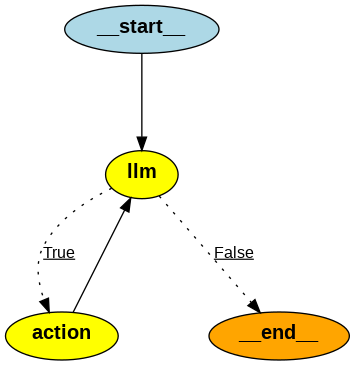

In [ ]:
# NExt visualise the graph we just craeted above
!apt-get -qq install -y graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

from IPython.display import Image

Image(abot.graph.get_graph().draw_png())


In [ ]:
# Lets call the Agent
# To call the Agent we create HumanMessage represnting user message
# We invoke the Agent.Graph
# We geta result
messages = [HumanMessage(content="What is the weather in SF and LA?")]
result = abot.graph.invoke({"messages": messages})

Calling: {'name': 'tavily_search_results_json', 'args': {'query': 'current weather in San Francisco'}, 'id': 'call_skDbpLSI9StI2wiMI7GKV3SA', 'type': 'tool_call'}
Calling: {'name': 'tavily_search_results_json', 'args': {'query': 'current weather in Los Angeles'}, 'id': 'call_nWbH2KXP83Ok0KVZANbOhRcB', 'type': 'tool_call'}
Back to the model!


In [ ]:
# Wee the result
# It is a list of mesages
# result is final state
result

{'messages': [HumanMessage(content='What is the weather in SF and LA?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_skDbpLSI9StI2wiMI7GKV3SA', 'function': {'arguments': '{"query": "current weather in San Francisco"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}, {'id': 'call_nWbH2KXP83Ok0KVZANbOhRcB', 'function': {'arguments': '{"query": "current weather in Los Angeles"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 60, 'prompt_tokens': 153, 'total_tokens': 213, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_51e1070cf2', 'id': 'chatcmpl-C8B8BebM9sTDNL84Hz6puYatoos39', 'service_tier': 'default',

In [ ]:
# print last element of messages
print(result['messages'][-1].content)

Here is the current weather for both cities:

San Francisco (SF):
- Today: Low clouds giving way to bright sun.
- Last year's weather for this date: High of 72°F (22°C), low of 61°F (16°C), wind 11 mph, UV index 7.
- Air quality: Good, no limitations for outdoor activity.
- Note: There is an extreme UV Index warning today (11+), so sun protection is strongly recommended.

Los Angeles (LA):
- Today: Mostly bright, clear, and warm.
- Last year's weather for this date: High of 81°F (27°C), low of 59°F (15°C), wind 7 mph, UV index 8.
- Air quality: Generally acceptable, though sensitive individuals should take minor precautions.
- Note: Extreme UV Index warning today (11+), so sun protection is strongly recommended.

Summary: SF is experiencing a mix of clouds and sun with mild temperatures. LA is mainly sunny and warmer. Both cities have high UV index today.


In [ ]:
query = "Who won the super bowl in 2024? What is the GDP of the state?"
messages = [HumanMessage(content=query)]
result = abot.graph.invoke({"messages": messages})

Calling: {'name': 'tavily_search_results_json', 'args': {'query': 'Who won the Super Bowl in 2024?'}, 'id': 'call_EOTeagIFqMbjRyzeYAbETXot', 'type': 'tool_call'}
Calling: {'name': 'tavily_search_results_json', 'args': {'query': 'GDP of the state that won the Super Bowl in 2024'}, 'id': 'call_toOep8x4kdcGmMBCau5M7EHP', 'type': 'tool_call'}
Back to the model!


In [ ]:
# We see above it first calls Tavily with 'Who won the Super Bowl in 2024?'
# It hen goes back to the model
# IT calls Tavily again  with 'GDP of the state that won the Super Bowl in 2024'
# Goes back to the model

result['messages'][-1].content

"The Kansas City Chiefs won the Super Bowl in 2024 (Super Bowl LVIII), defeating the San Francisco 49ers 25-22 in overtime.\n\nThe Kansas City Chiefs are based in Missouri. As of the most recent data, Missouri's GDP is approximately $411 billion (according to the U.S. Bureau of Economic Analysis, 2022 estimate; more current data may be slightly higher but generally in this range). If you need the latest updated GDP figure, let me know!"

In [ ]:
# The difference above is that in order to amke the second query it
# had to know the result of the first query
# So calls one tool
# Goes back to model
# to call second tool